# Hamoye Stage D - Amit Purswani

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
# prints Training data: (60000, 28, 28), (60000,)
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))
# prints Test data: (10000, 28, 28), (10000,)
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))
# prints There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]

Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


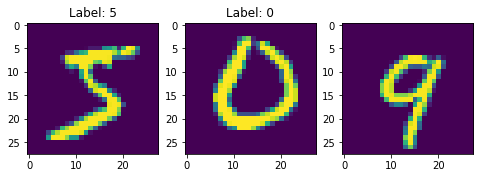

In [5]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

plt.subplot(1,3,3)
plt.imshow(test_images[12])

plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

print("x_train: {}".format(x_train.shape)) # prints x_train: (50000, 28, 28)
print("x_val: {}".format(x_val.shape)) # prints x_val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) #prints y_train: (50000,)
print("y_val: {}".format(y_val.shape)) #prints y_val: (10000,)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [8]:
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

print("x_train: {}".format(x_train.shape)) #prints  x_train: (50000, 784)
print("x_val: {}".format(x_val.shape)) #prints x_val: (10000, 784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [9]:
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [10]:
# inputs
#placeholders are not enabled in tf 2
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

In [11]:
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  # first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

  # second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), 
                                          second_bias))

  # output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits

In [12]:
logits = multilayer_perceptron(X, no_labels)

learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

#initialise the variables
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size 
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))
    
  #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.9169999957084656


In [18]:
#Building a Sequential Feed Forward Network in Keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#Build the model object
model = Sequential()
# Build the input and the hidden layers
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
# Build the output layer
model.add(Dense(no_labels, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.7042 - acc: 0.8109

C:\Users\krane\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


50000/50000 [==============================] - 3s 61us/sample - loss: 0.6956 - acc: 0.8131 - val_loss: 0.2625 - val_acc: 0.9241
Epoch 2/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.2378 - acc: 0.9322 - val_loss: 0.1868 - val_acc: 0.9477
Epoch 3/20
50000/50000 [==============================] - 1s 20us/sample - loss: 0.1731 - acc: 0.9503 - val_loss: 0.1510 - val_acc: 0.9573
Epoch 4/20
50000/50000 [==============================] - 1s 19us/sample - loss: 0.1352 - acc: 0.9614 - val_loss: 0.1286 - val_acc: 0.9633
Epoch 5/20
50000/50000 [==============================] - 1s 19us/sample - loss: 0.1096 - acc: 0.9684 - val_loss: 0.1141 - val_acc: 0.9675
Epoch 6/20
50000/50000 [==============================] - 1s 19us/sample - loss: 0.0917 - acc: 0.9743 - val_loss: 0.1038 - val_acc: 0.9682
Epoch 7/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.0770 - acc: 0.9785 - val_loss: 0.0941 - val_acc: 0.9713
Epoch 8/20
50000/50000 [==============

Text(0.5, 1.0, 'Loss Curves - before regularisation')

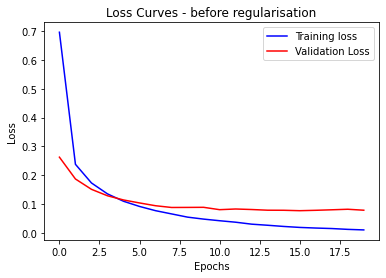

In [21]:

#Check for Overfitting

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

In [22]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                            epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.9551 - acc: 0.6950 - val_loss: 0.2894 - val_acc: 0.9192
Epoch 2/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.3811 - acc: 0.8866 - val_loss: 0.2060 - val_acc: 0.9410
Epoch 3/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.2856 - acc: 0.9159 - val_loss: 0.1658 - val_acc: 0.9526
Epoch 4/20
50000/50000 [==============================] - 1s 23us/sample - loss: 0.2358 - acc: 0.9309 - val_loss: 0.1402 - val_acc: 0.9588
Epoch 5/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.1994 - acc: 0.9408 - val_loss: 0.1229 - val_acc: 0.9645
Epoch 6/20
50000/50000 [==============================] - 1s 24us/sample - loss: 0.1784 - acc: 0.9466 - val_loss: 0.1100 - val_acc: 0.9685
Epoch 7/20
50000/50000 [==============================] - 1s 24us/sample - loss: 0.1542 - acc: 0.9546 - val_loss: 0.

In [23]:

test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Test loss: 0.07113996025538072
Test accuracy: 0.9799000024795532


Text(0.5, 1.0, 'Loss Curves - after regularisation')

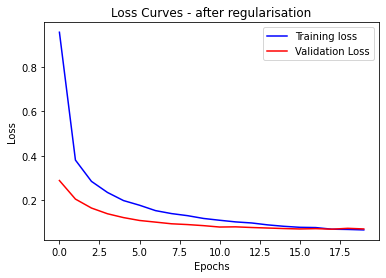

In [24]:

plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')

In [25]:
predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[1000])) # Print out 9

9


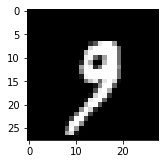

In [26]:
# Let's see whether the image would turn out to be 9
# Remember that the input data to the network were flattened for the purpose of learning to a vector with a length of 784. Before displaying it, we need to convert it back to the size of 28 x 28 pixels.
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[1000].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image

In [27]:
# You can try out others and play around with them
predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[6700])) # Print out the number

4


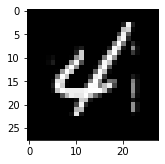

In [28]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[6700].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image

# End of Notebook